# ИР2 №4 (аналитический + численный этап)

по условию
- $E=[0,10]$
- $F(x)=\lfloor 2x\rfloor$
- $A=\{x:\ \text{10-я десятичная цифра дробной части равна }5\}$
- $B=\{x:\ \text{десятичные цифры дробной части неубывают}\}$
- $C=\{x:\ \text{троичные цифры дробной части неубывают}\}$

Функция
$$
f(x)=
\begin{cases}
1,& x \text{ принадлежит ровно одному из }A,B,C\\
2,& (x\in A\cup B\cup C)\Rightarrow(x\in A\cap B\cap C)\\
3,& \text{иначе}
\end{cases}
$$

аналитический этап
1) доказать измеримость $f$  
2) построить простые $f_n\le f$, $f_n\to f$  
3) по определению вычислить $\int_E f\,d\mu$  
4) доказать, что $F$ задаёт меру Лебега Стилтьеса $\mu_F$  
5) вычислить $\int_E f\,dF$



In [38]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb, log

## Аналитический этап

### 1) Измеримость $f$

- $A$ измеримо, условие на фиксированную десятичную цифру задаёт объединение полуинтервалов (борелевское множество)
- Для $B$ вводим аппроксимации $B_n$, первые $n$ десятичных цифр неубывают, тогда $B_n$ конечное объединение интервалов, значит измеримо, и
  $$B=\bigcap_{n\ge 1} B_n$$
  значит $B$ измеримо
- Аналогично для $C$, через $C_n$ по первым $n$ троичным цифрам
  $$C=\bigcap_{n\ge 1} C_n$$
  значит $C$ измеримо

Тогда множества "ровно одно из $A,B,C$", "ровно два", "ни в одном", "во всех трёх" получаются из $A,B,C$ через $\cup,\cap,\setminus$, значит измеримы, и $f$ (как кусочная по измеримым множествам) измерима


### 2) Построение простых функций $f_n \le f$ и $f_n\to f$ почти всюду

$\mu(B)=\mu(C)=0$, поэтому множество, где $f(x)=3$ ("ровно два множества"), имеет меру ноль и не влияет на интеграл Лебега

Строим простую функцию
$$
f_n(x)=1\cdot \mathbf{1}_A(x) + 2\cdot \mathbf{1}_{E\setminus A}(x)
$$
Тогда
- $f_n$ простая
- $f_n\le f$ (возможное отличие только там, где $f=3$, а там $f_n=2\le 3$)
- $f_n\to f$ почти всюду, потому что отличия возможны только на множестве меры 0

численно видно, что $\mu(B_n)\to 0$ и $\mu(C_n)\to 0$, откуда следует $\mu(B)=\mu(C)=0$


### Проверка, что $\mu(B)=\mu(C)=0$ через оценки $\mu(B_n), \mu(C_n)$
(оценка мер $(B_n), (C_n)$)
____
Для $x\in[0,1]$
- число неубывающих десятичных последовательностей длины $n$ равно $\binom{n+9}{9}$, значит
  $$\mu(B_n\cap[0,1]) = \binom{n+9}{9}\cdot 10^{-n}$$
- число неубывающих троичных последовательностей длины $n$ равно $\binom{n+2}{2}$, значит
  $$\mu(C_n\cap[0,1]) = \binom{n+2}{2}\cdot 3^{-n}$$

Обе величины стремятся к 0 при $n\to\infty$ -> $\mu(B\cap[0,1])=\mu(C\cap[0,1])=0$ и тогда $\mu(B)=\mu(C)=0$ на $[0,10]$


**Графики $\mu(B_n), \mu(C_n)$**

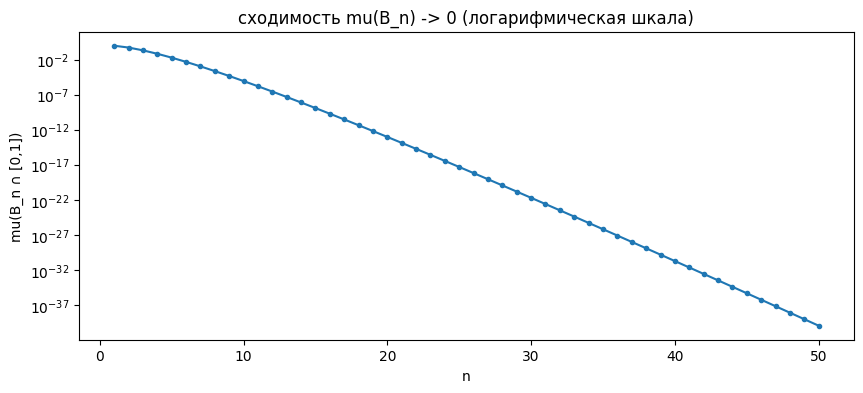

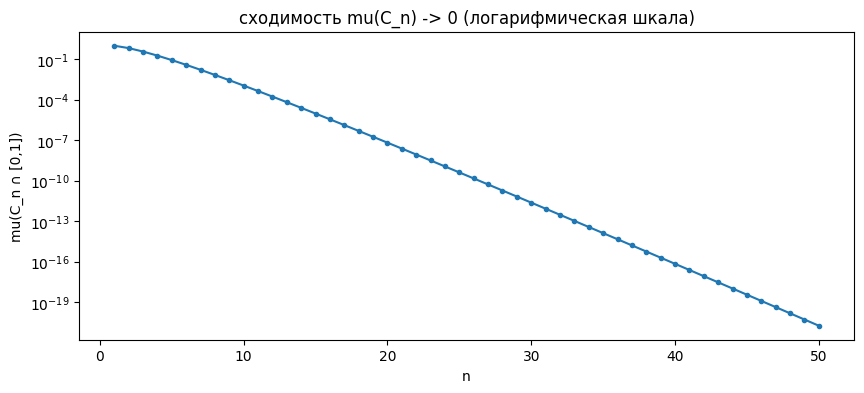

mu(B_50 ∩ [0,1]) = 1.2565671261e-40
mu(C_50 ∩ [0,1]) = 1.8470590846246618e-21


In [31]:
def mu_Bn_unit(n: int) -> float:
    return comb(n+9, 9) * (10**(-n))

def mu_Cn_unit(n: int) -> float:
    return comb(n+2, 2) * (3**(-n))

ns = np.arange(1, 51)
muB = np.array([mu_Bn_unit(int(n)) for n in ns], dtype=float)
muC = np.array([mu_Cn_unit(int(n)) for n in ns], dtype=float)

plt.figure(figsize=(10, 4))
plt.plot(ns, muB, marker='o', markersize=3)
plt.yscale("log")
plt.xlabel("n")
plt.ylabel("mu(B_n ∩ [0,1])")
plt.title("cходимость mu(B_n) -> 0 (логарифмическая шкала)")
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(ns, muC, marker='o', markersize=3)
plt.yscale("log")
plt.xlabel("n")
plt.ylabel("mu(C_n ∩ [0,1])")
plt.title("cходимость mu(C_n) -> 0 (логарифмическая шкала)")
plt.show()

print("mu(B_50 ∩ [0,1]) =", muB[-1])
print("mu(C_50 ∩ [0,1]) =", muC[-1])


### 3) Вычисление $\int_E f\,d\mu$

На каждом $[k,k+1)$ доля чисел, у которых 10-я десятичная цифра равна 5, равна $1/10$, значит $\mu(A\cap[k,k+1))=1/10$ и
$$
\mu(A)=10\cdot \frac{1}{10}=1
$$

Для простой функции $f_n = 1\mathbf{1}_A + 2\mathbf{1}_{E\setminus A}$
$$
\int_E f_n\,d\mu = 1\cdot \mu(A) + 2\cdot \mu(E\setminus A)
= 1\cdot 1 + 2\cdot 9 = 19
$$
Поскольку $f_n\to f$ п.в. и $0\le f_n\le 3$, получаем
$$
\int_E f\,d\mu = \lim_{n\to\infty}\int_E f_n\,d\mu = 19
$$


In [32]:
mu_E = 10.0
mu_A = 1.0
I_lebesgue = 1*mu_A + 2*(mu_E - mu_A)
I_lebesgue

19.0

### 4) Почему $F(x)=\lfloor 2x\rfloor$ задаёт меру Лебега–Стилтьеса

Функция $F$ неубывает и правосторонне непрерывна, значит существует мера $\mu_F$ такая, что
$$
\mu_F((a,b]) = F(b)-F(a)
$$
Интеграл Лебега–Стилтьеса определяется как
$$
\int_E f\,dF := \int_E f\,d\mu_F
$$

### 5) Вычисление $\int_E f\,dF$

На $[0,10]$ функция $F(x)=\lfloor 2x\rfloor$ имеет скачки величины 1 в точках
$$
t_k=\frac{k}{2},\quad k=1,2,\dots,20,\qquad \Delta F(t_k)=1
$$
Поэтому мера $\mu_F$ атомарна, и
$$
\int_0^{10} f\,dF = \sum_{k=1}^{20} f\!\left(\frac{k}{2}\right)\Delta F\!\left(\frac{k}{2}\right)
= \sum_{k=1}^{20} f\!\left(\frac{k}{2}\right)
$$

Значения $f(k/2)$
- при чётном $k$: $k/2\in\mathbb Z$, тогда $x\notin A$, но $x\in B$ и $x\in C$ (дробные цифры все нули) $\Rightarrow f=3$
- при нечётном $k$: $k/2=m+1/2$, десятичные дробные цифры $5,0,0,\dots$ не неубывают $\Rightarrow x\notin B$; при этом $1/2=0.1111\ldots_3$ $\Rightarrow x\in C$; также $x\notin A$ $\Rightarrow$ ровно одно множество $\Rightarrow f=1$

тогда
$$
\int_0^{10} f\,dF = 10\cdot 3 + 10\cdot 1 = 40
$$


In [33]:
def f_at_k_over_2(k: int) -> int:
    return 3 if (k % 2 == 0) else 1

vals = [(k/2, f_at_k_over_2(k)) for k in range(1, 21)]
I_stieltjes = sum(v for _, v in vals)

vals[:8], I_stieltjes


([(0.5, 1),
  (1.0, 3),
  (1.5, 1),
  (2.0, 3),
  (2.5, 1),
  (3.0, 3),
  (3.5, 1),
  (4.0, 3)],
 40)

## Численный этап

### 1) Монте-Карло для $\int_E f\,d\mu$

Чтобы точно проверять условие $x\in A$ ("10-я цифра"), генерируем точки
$$
x = k + \frac{j}{10^{10}},\quad k\in\{0,\dots,9\},\ j\in\{0,\dots,10^{10}-1\}
$$
Тогда 10-я цифра дробной части равна $j\bmod 10$
$$
x\in A \iff j\bmod 10 = 5
$$
Используем простую $f_n(x)=1$ на $A$ и $2$ вне $A$ (она совпадает с $f$ почти всюду, поэтому интеграл Лебега тот же)


In [34]:
P = 10
BASE = 10**P

def in_A_from_frac_index(j: int) -> bool:
    return (j % 10) == 5

def f_simple_from_j(j: int) -> int:
    return 1 if in_A_from_frac_index(j) else 2

def sample_points(M: int, seed=0):
    rng = np.random.default_rng(seed)
    k = rng.integers(0, 10, size=M, dtype=np.int64)
    j = rng.integers(0, BASE, size=M, dtype=np.int64)
    x = k + j / BASE
    y = np.array([f_simple_from_j(int(v)) for v in j], dtype=np.int64)
    return x, y

def mc_integral_lebesgue(M: int, seed=0) -> float:
    _, y = sample_points(M, seed=seed)
    return 10.0 * float(np.mean(y))


In [35]:
for M in [2_000, 10_000, 50_000, 200_000, 800_000]:
    est = mc_integral_lebesgue(M, seed=1)
    print(f"M={M:>8d}   оценка Монет Карло для ∫_0^10 f dμ  ≈  {est:.6f}")

print("\nЗначение", 19)


M=    2000   оценка Монет Карло для ∫_0^10 f dμ  ≈  18.945000
M=   10000   оценка Монет Карло для ∫_0^10 f dμ  ≈  19.014000
M=   50000   оценка Монет Карло для ∫_0^10 f dμ  ≈  18.977800
M=  200000   оценка Монет Карло для ∫_0^10 f dμ  ≈  18.999600
M=  800000   оценка Монет Карло для ∫_0^10 f dμ  ≈  18.995050

Значение 19


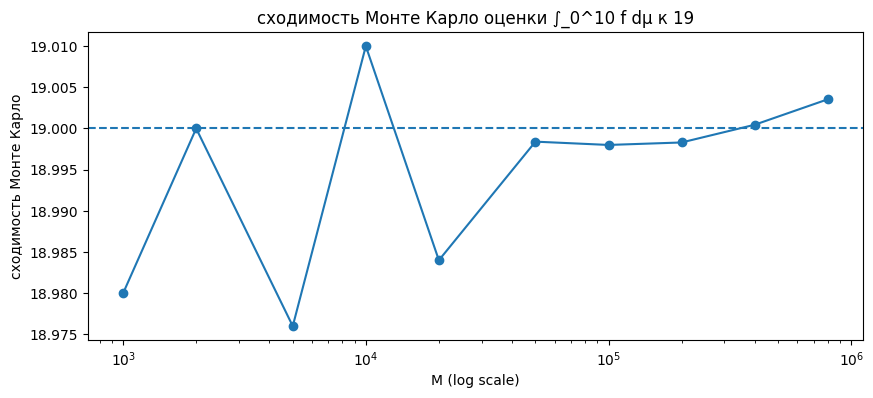

In [36]:
Ms = np.array([1_000, 2_000, 5_000, 10_000, 20_000, 50_000, 100_000, 200_000, 400_000, 800_000], dtype=int)
ests = np.array([mc_integral_lebesgue(int(M), seed=7) for M in Ms])

plt.figure(figsize=(10, 4))
plt.plot(Ms, ests, marker='o')
plt.axhline(19, linestyle='--')
plt.xscale("log")
plt.xlabel("M (log scale)")
plt.ylabel("сходимость Монте Карло")
plt.title("сходимость Монте Карло оценки ∫_0^10 f dμ к 19")
plt.show()


### 2) Проверка $\int_E f\,dF$

Для $F(x)=\lfloor 2x\rfloor$ интеграл равен сумме по скачкам
$$
\int_0^{10} f\,dF = \sum_{k=1}^{20} f\left(\frac{k}{2}\right)
$$



In [37]:
vals = [(k/2, f_at_k_over_2(k)) for k in range(1, 21)]
I_stieltjes = sum(v for _, v in vals)

print("k/2 and f(k/2):")
for t, v in vals:
    print(f"{t:>4} -> {v}")

print("\n∫_0^10 f dF =", I_stieltjes)
print("Значение", 40)


k/2 and f(k/2):
 0.5 -> 1
 1.0 -> 3
 1.5 -> 1
 2.0 -> 3
 2.5 -> 1
 3.0 -> 3
 3.5 -> 1
 4.0 -> 3
 4.5 -> 1
 5.0 -> 3
 5.5 -> 1
 6.0 -> 3
 6.5 -> 1
 7.0 -> 3
 7.5 -> 1
 8.0 -> 3
 8.5 -> 1
 9.0 -> 3
 9.5 -> 1
10.0 -> 3

∫_0^10 f dF = 40
Значение 40


### Ответ

- $\int_{0}^{10} f\,d\mu = 19$
- $\int_{0}^{10} f\,dF = 40$


## Итог

получили два ключевых результата для задачи 4

1) Интеграл Лебега по мере Лебега (обычный интеграл по $dx$)
- аналитически: $\int_0^{10} f\,d\mu = 19$
- численно (Монте-Карло): оценки стремятся к 19 при росте $M$

2) Интеграл Лебега–Стилтьеса по $F(x)=\lfloor 2x\rfloor$
- аналитически: $\int_0^{10} f\,dF = 40$
- численно: сумма по скачкам $F$ в точках $k/2$ даёт ровно 40 (точный расчёт)

Наглядно
- для $\int f\,d\mu$ видно сходимость Монте-Карло к 19
- для $\int f\,dF$ видно, что вклад дают только 20 точек (атомы меры), и значения $f(k/2)$ образуют понятную структуру: на целых $f=3$, на полуцелых $f=1$
